In [1]:
import cProfile
import logging

import numpy as np
from pylbm import lbm
import matplotlib.pyplot as plt

# logging.basicConfig(level=logging.DEBUG)
# log = logging.getLogger()

In [3]:
eps = 0.01
r_mean, u_mean = 0.5, 0.5
x_dim, y_dim = 5, 10
omega = 2
epochs = 300
r_ij = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=r_mean, eps=eps)
u_aij = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=u_mean, eps=eps)
f_cij = lbm.f_eq(u_axy=u_aij, r_xy=r_ij)

print(u_aij)
for _ in range(epochs):
    f_cij = lbm.stream(f_cxy=f_cij)
    f_cij, u_aij = lbm.collision(f_cxy=f_cij, omega=omega)
print(u_aij)

[[[0.51236829 0.50225118 0.49563584 0.5066593  0.49983167 0.50849984
   0.51348108 0.50529084 0.48084603 0.49023464]
  [0.49479717 0.49226406 0.49916281 0.51301361 0.49270568 0.4898437
   0.49189809 0.48273912 0.51114726 0.49491705]
  [0.51740119 0.4972223  0.49130751 0.4962271  0.50186384 0.5376901
   0.49632763 0.49019518 0.49638702 0.49801611]
  [0.50270659 0.48732143 0.48825404 0.48528849 0.49057756 0.49952076
   0.51596941 0.4920113  0.49257915 0.50293405]
  [0.50947179 0.50590301 0.51086059 0.49071086 0.47831716 0.48090576
   0.48821161 0.4902832  0.49756001 0.50027174]]

 [[0.50344116 0.49395616 0.49865779 0.4866428  0.49525374 0.50455803
   0.5084099  0.49663116 0.50792184 0.50379166]
  [0.52362732 0.49575658 0.49302631 0.52528701 0.48735573 0.48671797
   0.50192191 0.51295274 0.50965611 0.50118032]
  [0.50609786 0.50205057 0.50190758 0.50401119 0.50607964 0.49420863
   0.50529628 0.48679989 0.49963395 0.50734049]
  [0.48932609 0.5008572  0.49703056 0.49344138 0.50072624 0.5039

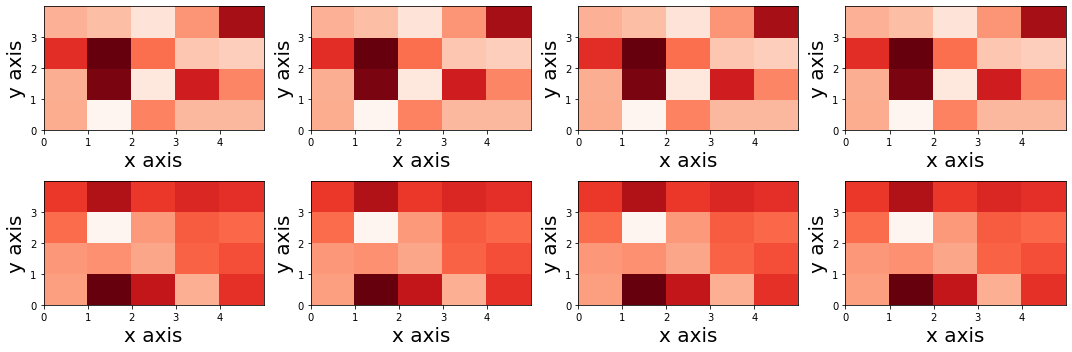

In [15]:
"""test what happens when the local density is increased in the center

Results:
    min local density decreases over time
    max local density first decreases then increases over time over initial max
    the density mainly follows a diagonal direction upwards direction and is rotated at the grid end
"""

eps = 0.01
r_mean, u_mean = 0.5, 0.5
x_dim, y_dim = 5, 4
omega = 0.1
multiplier = 100
epochs = 4 * multiplier

font_size = 20
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
fig, ax = plt.subplots(figsize=(15,5))
plt.axis('off')
axs = fig.subplots(nrows=2, ncols=epochs// multiplier)

r_ij = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=r_mean, eps=eps)
# increase local density in the center
r_ij[int(x_dim / 2 - 1) : int(x_dim / 2 + 1), int(y_dim / 2 - 1) : int(y_dim / 2 + 1)] = 0.9
u_aij = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=u_mean, eps=eps)
f_cij = lbm.f_eq(u_axy=u_aij, r_xy=r_ij)
for e in range(epochs):
    if e %  multiplier == 0:
        for i in range(2):
            ax = axs[i,e//multiplier]
            ax.grid(False)
            ax.set_xticks(np.arange(x_dim))
            ax.set_yticks(np.arange(y_dim).T)
            ax.set_xlabel("x axis")
            ax.set_ylabel("y axis")
            data = u_aij[i, :, :].T
            ax.pcolor(data, cmap=plt.cm.Reds)

    # f_cij = lbm.stream(f_cxy=f_cij)
    f_cij, u_aij = lbm.collision(f_cxy=f_cij, omega=omega)

fig.tight_layout()
# lbm.save_fig(fig, 'm3-streaming.pgf')
plt.show(fig)
plt.close()